In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

# 1: Implement lại các loss và r_squared bằng numpy

In [4]:
def mse(y_true: np.array, y_pred: np.array):
    return np.mean((y_pred - y_true)**2)

def rmse(y_true: np.array, y_pred: np.array):
    mean = np.mean((y_pred - y_true)**2)
    return mean**(1/2)

def mae(y_true: np.array, y_pred: np.array):
    sum = 0
    for i in range(0,len(y_true)):
        sum = sum + abs(y_true[i] - y_pred[i])
    result = sum / len(y_true)
    return result

def mape(y_true: np.array, y_pred: np.array):
    sum = 0
    for i in range(0,len(y_true)):
        sum = sum + abs(y_true[i] - y_pred[i])/(y_true[i])
    result = sum / len(y_true)
    return result


In [5]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
0.26666666666666666





# 2: Implement lại Ridge Regression

In [171]:
class RidgeRegression:
    def __init__(self, X, y, lambda_ = 0.1):
        self.w = 0
        self._X = X
        self._y = y
        self._lambda = lambda_
        self._n = X.shape[0] # lấy số hàng của ma trận X 

    def fit(self):
        Ones_ = np.ones((self._n, 1)) # tạo ra ma trận 1 cột chứa [1]
        # X = self._X.reshape(-1, 1) # chuyển ma trận X về ma trận 1 cột 
        X = np.hstack((Ones_, self._X)) # nối ma trận 1 cột [1] vào X
        XTx = np.dot(X.T,X)
        Identity =  np.identity(XTx.shape[0]) * self._lambda
        self.w = np.dot(np.linalg.inv(XTx + Identity), np.dot(X.T, self._y))
        return self.w

    def predict(self, X):
        # X = X.reshape(-1, 1)
        shape_x = X.shape[0]
        ones = np.ones((shape_x, 1))
        new_x = np.hstack((ones, X))
        return np.dot(new_x, self.w).reshape(1,-1)[0]

#3: Tạo dữ liệu toy_data

In [172]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

Model đa thức bậc 0

MSE : 0.4491694044120596
RMSE : 0.670201017913327
MSA : 0.5507908140738919
MAPE : 6.319213340303916


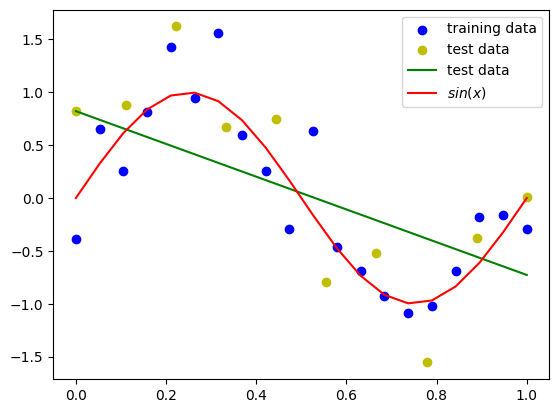

In [189]:
# code here

x_train, y_train = create_toy_data(func, 20, 0.4)
x_test, y_test = create_toy_data(func, 10, 0.4)
space = np.linspace(0, 1, 20)
x_dummy = np.linspace(0, 1, 20)
space_value = func(space)
b_x_train, b_y_train = x_train.copy(), y_train.copy() # Tạo bản copy để sử dụng với bài tập cuối

x_train_b = x_train.reshape(-1,1)
x_test_b = x_test.reshape(-1,1)
regression = RidgeRegression(x_train_b, y_train, lambda_ = 0)
regression.fit()

y_pred = regression.predict(x_test_b)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()



In [191]:
x_test, y_test = create_toy_data(func, 20, 0.4)

MSE : 0.37633725776203614
RMSE : 0.6134633304135106
MSA : 0.5291564097718406
MAPE : -0.45301278190356503


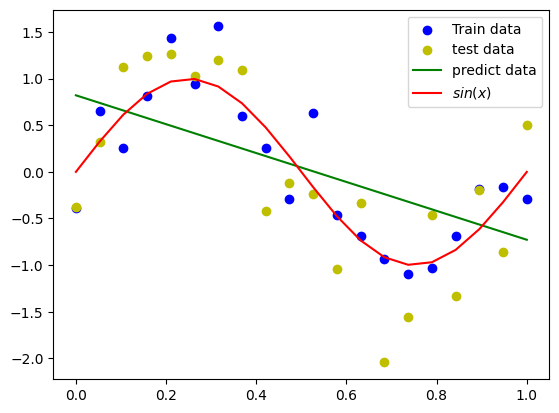

In [192]:
x_train_0 = x_train.reshape(-1, 1)
x_test_0 = x_test.reshape(-1, 1)
regression = RidgeRegression(x_train_0, y_train, lambda_ = 0)
regression.fit()
y_pred = regression.predict(x_test_0)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train,color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_test, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()


Model đa thức bậc 2

MSE : 0.37347296559932713
RMSE : 0.611124345448066
MSA : 0.5291564097718406
MAPE : -0.5477457871437489


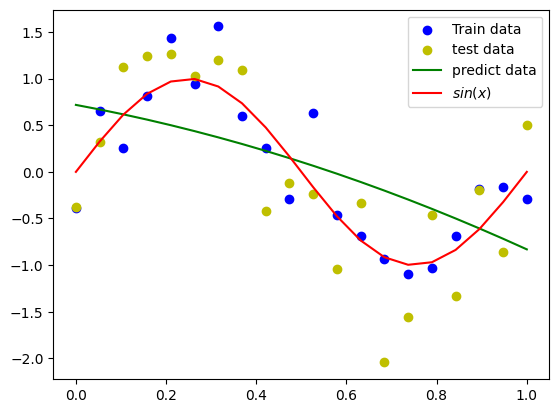

In [193]:
x_train_b2  = x_train.reshape(-1,1)
x_temp = x_train.reshape(-1 , 1)
x_train_b2 = np.hstack((x_train_b2, x_temp**2))

x_test_b2 = x_test.reshape(-1,1)
x_temp = x_test_b2.reshape(-1 , 1)
x_test_b2 = np.hstack((x_test_b2, x_temp**2))

regression = RidgeRegression(x_train_b2, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b2)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 3

MSE : 0.1185072670754869
RMSE : 0.34424884469738876
MSA : 0.29154263577534245
MAPE : -0.1669344394693605


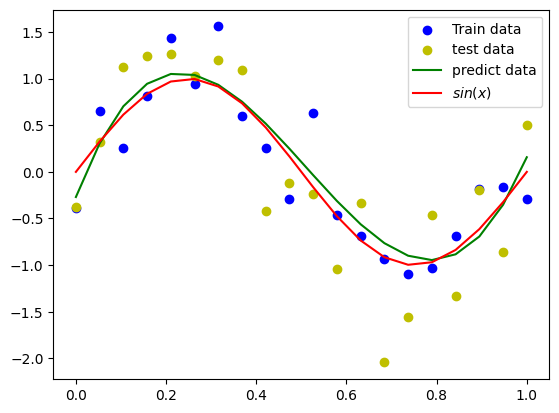

In [194]:
x_temp = x_train.reshape(-1,1)
x_train_b3 = np.hstack((x_test_b2, x_temp**3))

x_temp = x_test.reshape(-1,1)
x_test_b3 = np.hstack((x_test_b2, x_temp**3))

regression = RidgeRegression(x_train_b3, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b3)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c='r', label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 4

MSE : 0.11067819282211219
RMSE : 0.33268332212798435
MSA : 0.2723830365830972
MAPE : -0.0590584908964497


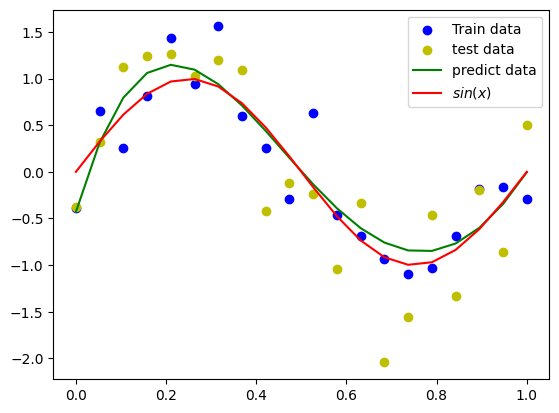

In [199]:
x_temp = x_train.reshape(-1,1)
x_train_b4 = np.hstack((x_test_b3, x_temp**4))

x_temp = x_test.reshape(-1,1)
x_test_b4 = np.hstack((x_test_b3, x_temp**4))

regression = RidgeRegression(x_train_b4, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b4)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 5

MSE : 0.09621631579205353
RMSE : 0.3101875493827138
MSA : 0.24424656423398247
MAPE : 0.0554069868556026


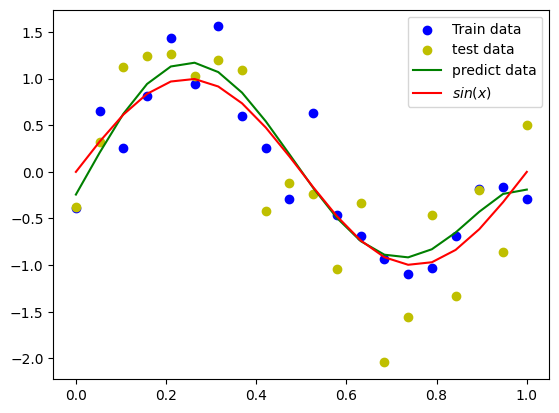

In [201]:
x_temp = x_train.reshape(-1,1)
x_train_b5 = np.hstack((x_test_b4, x_temp**5))

x_temp = x_test.reshape(-1,1)
x_test_b5 = np.hstack((x_test_b4, x_temp**5))

regression = RidgeRegression(x_train_b5, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b5)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 6

MSE : 0.0928198578093076
RMSE : 0.3046635157174347
MSA : 0.22372956153489398
MAPE : 0.12270160313969733


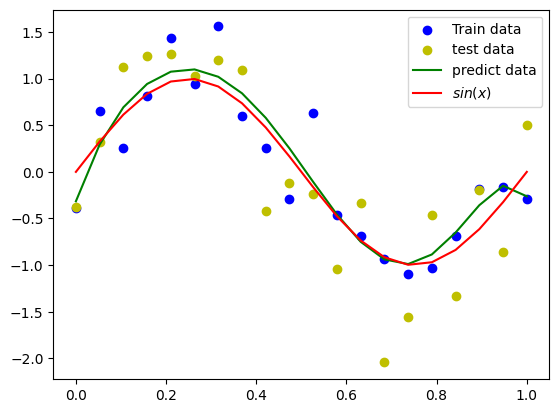

In [202]:
x_temp = x_train.reshape(-1,1)
x_train_b6 = np.hstack((x_test_b5, x_temp**6))

x_temp = x_test.reshape(-1,1)
x_test_b6 = np.hstack((x_test_b5, x_temp**6))

regression = RidgeRegression(x_train_b6, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b6)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 7

MSE : 0.0899183154035781
RMSE : 0.2998638281013202
MSA : 0.22102084722041132
MAPE : 0.09024650426946815


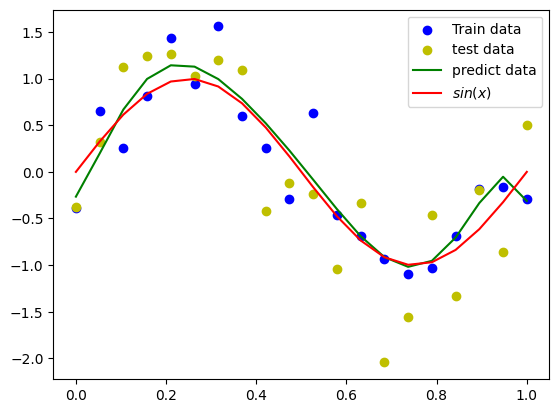

In [203]:
x_temp = x_train.reshape(-1,1)
x_train_b7 = np.hstack((x_test_b6, x_temp**7))

x_temp = x_test.reshape(-1,1)
x_test_b7 = np.hstack((x_test_b6, x_temp**7))

regression = RidgeRegression(x_train_b7, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b7)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 8

MSE : 0.08644930816089097
RMSE : 0.29402263205558
MSA : 0.2278242613090513
MAPE : 0.034288501334309086


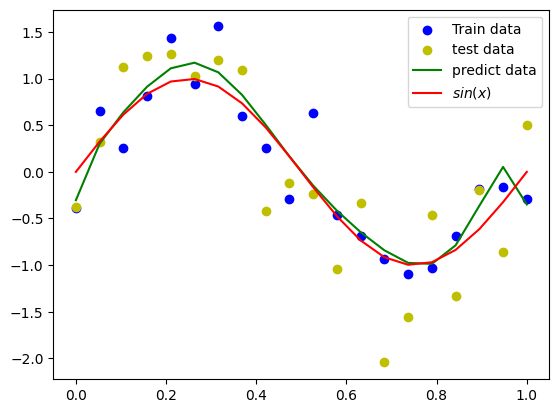

In [206]:
x_temp = x_train.reshape(-1,1)
x_train_b8 = np.hstack((x_test_b7, x_temp**8))

x_temp = x_test.reshape(-1,1)
x_test_b8 = np.hstack((x_test_b7, x_temp**8))

regression = RidgeRegression(x_train_b8, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b8)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

Model đa thức bậc 9

MSE : 0.058609008845863286
RMSE : 0.2420929756227208
MSA : 0.16781772143681187
MAPE : 0.018867473216814704


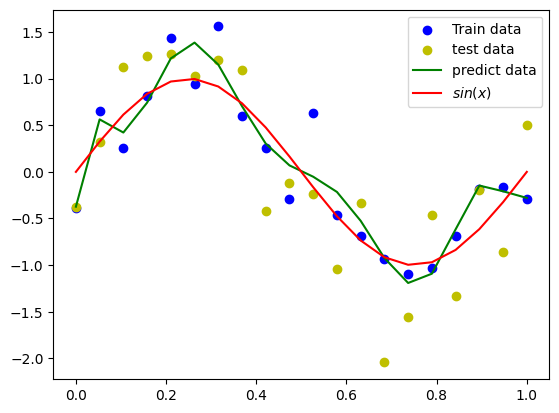

In [205]:
x_temp = x_train.reshape(-1,1)
x_train_b9 = np.hstack((x_test_b8, x_temp**9))

x_temp = x_test.reshape(-1,1)
x_test_b9 = np.hstack((x_test_b8, x_temp**9))

regression = RidgeRegression(x_train_b9, y_train, lambda_ = 0.000)
regression.fit()
y_pred = regression.predict(x_test_b9)

print("MSE :" , mse(y_train, y_pred))
print("RMSE :" , rmse(y_train, y_pred))
print("MSA :" , mae(y_train, y_pred))
print("MAPE :" , mape(y_train, y_pred))

plt.scatter(x_train, y_train, color = 'b', label = 'Train data' )
plt.scatter(x_test, y_test, color = 'y', label = 'test data')
plt.plot(x_dummy, y_pred, color = 'g', label = 'predict data')
plt.plot(space, space_value, c="r", label="$sin(x)$")
plt.legend()
plt.show()

## Nhận xét

bậc 1, 2 mô hình còn đơn giản, chưa bám sát vào mô hình train
bậc 3, 4, 5, 6, 7, 8 vẫn bám sát mô hình train chưa bám vào mô hình test
bậc 9 có thể bám vào mô hình test nhưng bị overfitting, chưa đúng.

# 3c: Với mỗi mô hình, tính loss train/val và nhận xét xem mô hình bị overfitting hay underfitting.

MSE : 0.7439223233076471
RMSE : 0.8625093178091742
MSA : [0.40611539]
MAPE : [0.54140565]


## Nhận xét

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

## Nhận xét

# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

In [217]:

x_train, y_train = create_toy_data(func, 30, 0.4)
x_test, y_test = create_toy_data(func, 20, 0.4)
space = np.linspace(0, 1, 20)
x_dummy = np.linspace(0, 1, 20)
space_value = func(space)

x_temp = x_train.reshape(-1,1)
x_train_b2 = np.hstack((x_temp, x_temp**2))
x_train_b3 = np.hstack((x_train_b2, x_temp**3))
x_train_b4 = np.hstack((x_train_b3, x_temp**4))
x_train_b5 = np.hstack((x_train_b4, x_temp**5))
x_train_b6 = np.hstack((x_train_b5, x_temp**6))
x_train_b7 = np.hstack((x_train_b6, x_temp**7))
x_train_b8 = np.hstack((x_train_b7, x_temp**8))
x_train_b9 = np.hstack((x_train_b8, x_temp**9))

x_temp = x_test.reshape(-1,1)
x_test_b2 = np.hstack((x_temp, x_temp**2))
x_test_b3 = np.hstack((x_test_b2, x_temp**3))
x_test_b4 = np.hstack((x_test_b3, x_temp**4))
x_test_b5 = np.hstack((x_test_b4, x_temp**5))
x_test_b6 = np.hstack((x_test_b5, x_temp**6))
x_test_b7 = np.hstack((x_test_b6, x_temp**7))
x_test_b8 = np.hstack((x_test_b7, x_temp**8))
x_test_b9 = np.hstack((x_test_b8, x_temp**9))

# print(x_test_b9)
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 0)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()

MSE : 0.16201851851208332
RMSE : 0.4025152400991586
MSA : 0.3031283089858832
MAPE : 0.06065751219067948


# 4b: Tăng tập train thêm 90 điểm dữ liệu

In [218]:
x_train, y_train = create_toy_data(func, 110, 0.4)
x_test, y_test = create_toy_data(func, 20, 0.4)
space = np.linspace(0, 1, 20)
x_dummy = np.linspace(0, 1, 20)
space_value = func(space)

x_temp = x_train.reshape(-1,1)
x_train_b2 = np.hstack((x_temp, x_temp**2))
x_train_b3 = np.hstack((x_train_b2, x_temp**3))
x_train_b4 = np.hstack((x_train_b3, x_temp**4))
x_train_b5 = np.hstack((x_train_b4, x_temp**5))
x_train_b6 = np.hstack((x_train_b5, x_temp**6))
x_train_b7 = np.hstack((x_train_b6, x_temp**7))
x_train_b8 = np.hstack((x_train_b7, x_temp**8))
x_train_b9 = np.hstack((x_train_b8, x_temp**9))

x_temp = x_test.reshape(-1,1)
x_test_b2 = np.hstack((x_temp, x_temp**2))
x_test_b3 = np.hstack((x_test_b2, x_temp**3))
x_test_b4 = np.hstack((x_test_b3, x_temp**4))
x_test_b5 = np.hstack((x_test_b4, x_temp**5))
x_test_b6 = np.hstack((x_test_b5, x_temp**6))
x_test_b7 = np.hstack((x_test_b6, x_temp**7))
x_test_b8 = np.hstack((x_test_b7, x_temp**8))
x_test_b9 = np.hstack((x_test_b8, x_temp**9))

# print(x_test_b9)
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 0)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()

MSE : 0.1084468434209969
RMSE : 0.3293126833588359
MSA : 0.26963074931279085
MAPE : 0.4101464679677724


4c: thử Lasso regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.

In [227]:
x_train, y_train = create_toy_data(func, 20, 0.4)
x_test, y_test = create_toy_data(func, 20, 0.4)
space = np.linspace(0, 1, 20)
x_dummy = np.linspace(0, 1, 20)
space_value = func(space)

x_temp = x_train.reshape(-1,1)
x_train_b2 = np.hstack((x_temp, x_temp**2))
x_train_b3 = np.hstack((x_train_b2, x_temp**3))
x_train_b4 = np.hstack((x_train_b3, x_temp**4))
x_train_b5 = np.hstack((x_train_b4, x_temp**5))
x_train_b6 = np.hstack((x_train_b5, x_temp**6))
x_train_b7 = np.hstack((x_train_b6, x_temp**7))
x_train_b8 = np.hstack((x_train_b7, x_temp**8))
x_train_b9 = np.hstack((x_train_b8, x_temp**9))

x_temp = x_test.reshape(-1,1)
x_test_b2 = np.hstack((x_temp, x_temp**2))
x_test_b3 = np.hstack((x_test_b2, x_temp**3))
x_test_b4 = np.hstack((x_test_b3, x_temp**4))
x_test_b5 = np.hstack((x_test_b4, x_temp**5))
x_test_b6 = np.hstack((x_test_b5, x_temp**6))
x_test_b7 = np.hstack((x_test_b6, x_temp**7))
x_test_b8 = np.hstack((x_test_b7, x_temp**8))
x_test_b9 = np.hstack((x_test_b8, x_temp**9))

# print(x_test_b9)

regression = RidgeRegression(x_train_b9, y_train, lambda_ = 0.1)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()



MSE : 0.2773164753157434
RMSE : 0.5266084649108324
MSA : 0.39619232086781137
MAPE : -0.4797113996428301


MSE : 0.40188786704806123
RMSE : 0.6339462651109014
MSA : 0.5338021034985188
MAPE : -0.4925167209475048


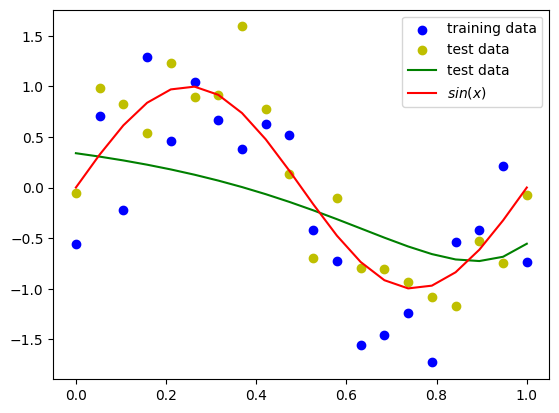

In [228]:
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 1)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()



MSE : 0.5902334463023993
RMSE : 0.768266520357616
MSA : 0.6561432654715643
MAPE : -0.18928160887213644


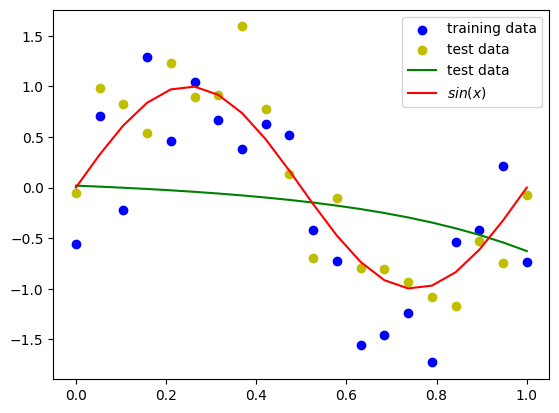

In [229]:
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 10)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()



MSE : 0.465744191017914
RMSE : 0.6824545340298604
MSA : 0.5798227668793137
MAPE : -0.42381049233969553


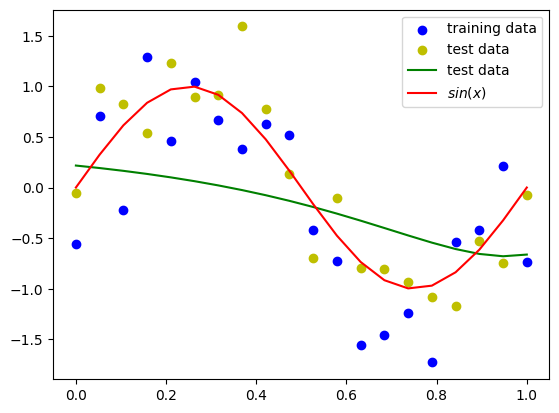

In [230]:
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 2)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()



MSE : 0.4181254921098428
RMSE : 0.6466262383400807
MSA : 0.5464663127498889
MAPE : -0.47724058573230976


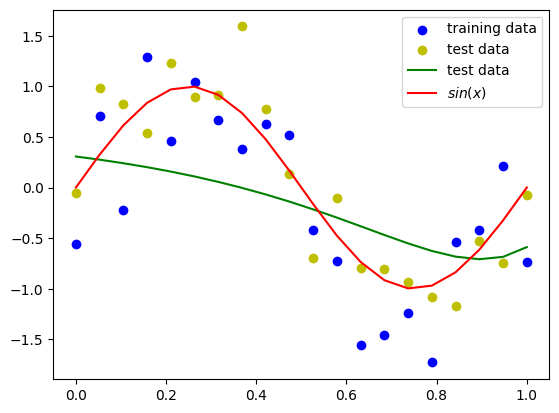

In [231]:
regression = RidgeRegression(x_train_b9, y_train, lambda_ = 1.2)
regression.fit()
y_pred = regression.predict(x_test_b9)
print("MSE :" , mse(y_test, y_pred))
print("RMSE :" , rmse(y_test, y_pred))
print("MSA :" , mae(y_test, y_pred))
print("MAPE :" , mape(y_test, y_pred))

plt.scatter(x_train, y_train, color="b", label="training data")
plt.scatter(x_test, y_test, color="y",  label="test data")
plt.plot(x_test, y_pred, color="g",  label="test data")
plt.plot(space, space_value, color="r", label="$sin(x)$")
plt.legend()
plt.show()